In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
import pandas as pd
import tensorflow as tf    # tensorflow ver. 2
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, Reshape
from tensorflow.keras.optimizers import Adam

In [0]:
path = './gdrive/My Drive/2020_AI_Class/03.Deep Learning/traffic_data/'
# set LABEL first
output_cols = ['vel']
# set traffic column
input_cols = ['vel_t05', 'vel_t10', 'vel_t15', 'vel_t20', 'vel_t25', 'vel_t30', 'vel_t35', 'vel_t40']

In [9]:
# Model, Cost, Tain
model = Sequential()
model.add(Reshape((len(input_cols), 1), input_shape=(len(input_cols),)))
model.add(Conv1D(10, kernel_size=[2], padding='same', data_format='channels_last', activation='relu'))
model.add(MaxPool1D(pool_size=2, padding='valid', data_format='channels_last'))
model.add(Conv1D(10, kernel_size=[2], padding='same', data_format='channels_last', activation='relu'))
model.add(Flatten())
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation=None))

model.compile(loss='mse',optimizer=Adam(0.001), metrics=['mape'])  # Mean Asolute Percentage Error
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 8, 1)              0         
_________________________________________________________________
conv1d (Conv1D)              (None, 8, 10)             30        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 4, 10)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 4, 10)             210       
_________________________________________________________________
flatten (Flatten)            (None, 40)                0         
_________________________________________________________________
dense (Dense)                (None, 30)                1230      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3

In [0]:
# Train Data
train_data = pd.read_csv(path + 'traffic_data_train.csv', index_col=0)
X_train = train_data[input_cols].values
Y_train = train_data[output_cols].values

In [12]:
train_data.head()

,vel,date,time,vel_t05,vel_t10,vel_t15,vel_t20,vel_t25,vel_t30,vel_t35,vel_t40
0,87.97,20150911,145,92.61,87.62,97.10,96.15001,89.60,94.73,92.55,93.91
1,94.30,20150118,1725,90.42,90.75,98.72,97.54000,96.54,95.66,97.19,95.52
2,82.44,20151015,420,80.88,86.17,80.72,89.56000,74.97,79.61,83.27,81.66
3,90.22,20150606,445,91.26,90.98,95.49,89.78000,91.46,85.99,85.85,89.34
4,97.69,20150720,1250,93.60,94.37,92.67,91.72000,95.67,92.86,92.03,92.46


In [13]:
X_train[:5]

array([[92.61   , 87.62   , 97.1    , 96.15001, 89.6    , 94.73   ,
        92.55   , 93.91   ],
       [90.42   , 90.75   , 98.72   , 97.54   , 96.54   , 95.66   ,
        97.19   , 95.52   ],
       [80.88   , 86.17   , 80.72   , 89.56   , 74.97   , 79.61   ,
        83.27   , 81.66   ],
       [91.26   , 90.98   , 95.49   , 89.78   , 91.46   , 85.99   ,
        85.85   , 89.34   ],
       [93.6    , 94.37   , 92.67   , 91.72   , 95.67   , 92.86   ,
        92.03   , 92.46   ]])

In [14]:
# Training
model.fit(X_train, Y_train, epochs=10, batch_size=1024, verbose=1)

Epoch 1/10
101/101 [==============================] - 1s 7ms/step - loss: 1697.9408 - mape: 30.7315
Epoch 2/10
101/101 [==============================] - 1s 7ms/step - loss: 36.4613 - mape: 4.4126
Epoch 3/10
101/101 [==============================] - 1s 7ms/step - loss: 29.3977 - mape: 3.9402
Epoch 4/10
101/101 [==============================] - 1s 6ms/step - loss: 26.0334 - mape: 3.7512
Epoch 5/10
101/101 [==============================] - 1s 7ms/step - loss: 22.5673 - mape: 3.5427
Epoch 6/10
101/101 [==============================] - 1s 7ms/step - loss: 20.7525 - mape: 3.4232
Epoch 7/10
101/101 [==============================] - 1s 6ms/step - loss: 19.7022 - mape: 3.3664
Epoch 8/10
101/101 [==============================] - 1s 7ms/step - loss: 18.8013 - mape: 3.2976
Epoch 9/10
101/101 [==============================] - 1s 6ms/step - loss: 18.2617 - mape: 3.2619
Epoch 10/10
101/101 [==============================] - 1s 6ms/step - loss: 17.8727 - mape: 3.2428


In [0]:
# Test Data #1
test1_data = pd.read_csv(path + 'traffic_data_test1.csv', index_col=0)
X_test1 = test1_data[input_cols].values
Y_test1 = test1_data[output_cols].values

In [16]:
model.evaluate(X_test1, Y_test1)

32/32 [==============================] - 0s 1ms/step - loss: 15.7178 - mape: 3.2481


[15.717801094055176, 3.2480626106262207]

In [17]:
# Test Data #2
test2_data = pd.read_csv(path + 'traffic_data_test2.csv', index_col=0)
test2_data.head()

,date,time,vel,vel_t05,vel_t10,vel_t15,vel_t20,vel_t25,vel_t30,vel_t35,vel_t40
0,20160209,0,94.70,97.11001,96.10000,93.97000,95.69000,94.04000,95.10,88.22,92.24
1,20160209,5,95.52,94.70000,97.11001,96.10000,93.97000,95.69000,94.04,95.10,88.22
2,20160209,10,100.31,95.52000,94.70000,97.11001,96.10000,93.97000,95.69,94.04,95.10
3,20160209,15,91.80,100.31000,95.52000,94.70000,97.11001,96.10000,93.97,95.69,94.04
4,20160209,20,96.30,91.80000,100.31000,95.52000,94.70000,97.11001,96.10,93.97,95.69


In [0]:
test2_data['date'] = pd.to_datetime(test2_data['date'], format='%Y%m%d')
test2_data['time'] = test2_data['time'].map(lambda x: pd.Timedelta(hours=x // 100, minutes=x % 100))

In [0]:
test2_data['datetime'] = test2_data['date'] + test2_data['time']
X_test2 = test2_data[input_cols].values
Y_test2 = test2_data[output_cols].values

In [20]:
model.evaluate(X_test2, Y_test2)

9/9 [==============================] - 0s 1ms/step - loss: 54.9300 - mape: 8.9221


[54.92997741699219, 8.92208194732666]

In [21]:
prediction = model.predict(X_test2)
prediction

array([[ 96.212006],
       [ 94.78142 ],
       [ 95.526825],
       [ 96.445404],
       [ 94.479965],
       [ 94.00104 ],
       [ 96.667206],
       [ 94.75831 ],
       [ 95.737076],
       [ 94.387184],
       [ 95.85385 ],
       [ 96.6758  ],
       [ 95.85856 ],
       [ 99.00174 ],
       [ 97.375534],
       [ 97.878494],
       [ 98.092636],
       [ 98.39292 ],
       [ 89.63465 ],
       [ 87.96694 ],
       [ 96.91162 ],
       [ 91.3004  ],
       [ 98.31963 ],
       [ 95.50825 ],
       [ 96.250595],
       [ 99.81656 ],
       [ 99.448555],
       [ 97.90658 ],
       [ 93.81254 ],
       [106.255264],
       [101.298676],
       [ 97.03017 ],
       [ 96.50778 ],
       [101.25908 ],
       [ 97.429276],
       [ 98.40462 ],
       [100.469574],
       [ 93.933304],
       [ 92.96162 ],
       [101.537964],
       [ 97.99251 ],
       [ 99.79477 ],
       [100.007195],
       [102.01555 ],
       [ 99.49803 ],
       [ 92.91842 ],
       [ 97.59645 ],
       [102.4

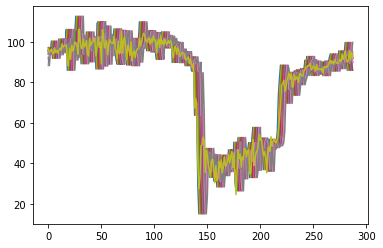

In [23]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot()

plt.plot(X_test2)
plt.plot(prediction)
plt.show()
# ax.lengend(['Prediction', 'Real'])